In [1]:
#|default_exp app

# Sports Instrument Recognizer

In [2]:
!pip install -Uqq fastai gradio nbdev

In [3]:
from fastai.vision.all import *

c:\Users\saadi\.conda\envs\sports_ins\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [12]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [18]:
#!export
model = load_learner('models/dataloader-v1.pkl')

In [14]:
#!export
sport_instrument_labels = (
'Badminton cork',
'Badminton racket',
'Baseball bat',
'Basket ball',
'Bowling ball',
'Cricket ball',
'Cricket bat',
'Cricket helmet',
'Frisbee disc',
'Goal keeping gloves',
'Golf club', 'Hockey helmet',
'Hockey stick', 'Lacrosse stick',
'Pool cue',
'Rugby ball',
'Soccer ball',
'Squash racket',
'Table tennis paddle',
'Tennis racket',
'Volleyball ball'
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(sport_instrument_labels, map(float, probs)))

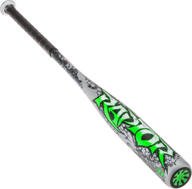

In [15]:
img = PILImage.create(f'test_images/ex1.jpeg')
img.thumbnail((192,192))
img

In [16]:
recognize_image(img)

{'Badminton cork': 1.2566520126711112e-05,
 'Badminton racket': 3.7650246667908505e-05,
 'Baseball bat': 0.2659130394458771,
 'Basket ball': 4.196943336864933e-06,
 'Bowling ball': 0.00016057664470281452,
 'Cricket ball': 6.179384945426136e-05,
 'Cricket bat': 0.003577623050659895,
 'Cricket helmet': 1.0126639153895667e-06,
 'Frisbee disc': 1.1912798072444275e-05,
 'Goal keeping gloves': 1.1550794624781702e-05,
 'Golf club': 1.6262270946754143e-05,
 'Hockey helmet': 0.00015805546718183905,
 'Hockey stick': 0.6939101815223694,
 'Lacrosse stick': 0.03549133613705635,
 'Pool cue': 0.00031480484176427126,
 'Rugby ball': 2.0269337255740538e-05,
 'Soccer ball': 1.1441881724749692e-05,
 'Squash racket': 1.9465987861622125e-05,
 'Table tennis paddle': 6.980364446462772e-07,
 'Tennis racket': 3.898618160746992e-06,
 'Volleyball ball': 0.00026170918135903776}

In [ ]:
#!export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'test_images/ex1.jpeg',
    'test_images/ex2.jpeg',
    'test_images/ex3.jpg',
    'test_images/ex3.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False,share=True)

C:\Users\saadi\AppData\Local\Temp\ipykernel_5032\2530851068.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
C:\Users\saadi\AppData\Local\Temp\ipykernel_5032\2530851068.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
C:\Users\saadi\AppData\Local\Temp\ipykernel_5032\2530851068.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
C:\Users\saadi\AppData\Local\Temp\ipykernel_5032\2530851068.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://a5e5b07e1147988b2b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Notebook to Python Script Export

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')